# ETL

En este primer notebook se realizará el __ETL__ de los datasets y una __exploración de los datos__.

## steam_games

Este Dataset contiene información sobre los videojuegos. Se puede saber mas sobre sus atributos en el **Diccionario de Datos STEAM**.

In [1]:
# Importar las librerias necesarias.
import gzip
import json
import ast  
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MultiLabelBinarizer
from textblob import TextBlob
from langdetect import detect
sns.set()

In [2]:
# Extraer los datos a partir del archivo JSON comprimido con gzip.
file_path = "./Datasets/steam_games.json.gz"

data_list = []  # Lista para almacenar los objetos JSON

# Se requiere este método para leer el archivo y manejar errores de 
# codificación y anidamiento de los datos.
with gzip.open(file_path, 'rt', encoding='utf-8') as f:
    for line in f:

        try:
            obj = json.loads(line) # Cargar la línea actual como un objeto JSON.
            data_list.append(obj) # Agregar el objeto JSON válido a la lista.

        # Manejar errores de decodificación JSON e imprimir un mensaje.
        except json.JSONDecodeError:
            print(f"Error al cargar línea: {line}") 

In [3]:
# Crear un DataFrame a partir de la lista de datos.
games_df = pd.DataFrame(data_list)

# Visualizar los primeros resultados.
games_df.head(3)

,publisher,genres,app_name,title,url,release_date,tags,reviews_url,specs,price,early_access,id,developer
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
print(f"El df tiene {games_df.shape[0]} filas y {games_df.shape[1]} columnas.")

El df tiene 120445 filas y 13 columnas.


In [5]:
# Obtener el promedio de nulos en cada columna.
games_df.isnull().mean()

publisher       0.800050
genres          0.760455
app_name        0.733214
title           0.750218
url             0.733198
release_date    0.750359
tags            0.734551
reviews_url     0.733214
specs           0.738760
price           0.744630
early_access    0.733198
id              0.733214
developer       0.760588
dtype: float64

Se observa que todas las columnas tienen mas de 70% de nulos y en algunas filas todos sus valores son nulos, por lo que se eliminará dichas filas.

In [6]:
games_df = games_df.dropna(how="all").reset_index(drop=True)

In [7]:
# Quedaron aproximadamente 25% de las filas.
print(f"El df tiene {games_df.shape[0]} filas y {games_df.shape[1]} columnas.")

El df tiene 32135 filas y 13 columnas.


In [8]:
# El promedio de nulos bajó notablemente.
games_df.isnull().mean()

publisher       0.250568
genres          0.102163
app_name        0.000062
title           0.063793
url             0.000000
release_date    0.064322
tags            0.005072
reviews_url     0.000062
specs           0.020850
price           0.042850
early_access    0.000000
id              0.000062
developer       0.102661
dtype: float64

In [9]:
# Visualizar los primeros resultados.
games_df.head()

,publisher,genres,app_name,title,url,release_date,tags,reviews_url,specs,price,early_access,id,developer
0,Kotoshiro,"[Action, Casual, Indie, Simulation, Strategy]",Lost Summoner Kitty,Lost Summoner Kitty,http://store.steampowered.com/app/761140/Lost_...,2018-01-04,"[Strategy, Action, Indie, Casual, Simulation]",http://steamcommunity.com/app/761140/reviews/?...,[Single-player],4.99,False,761140,Kotoshiro
1,"Making Fun, Inc.","[Free to Play, Indie, RPG, Strategy]",Ironbound,Ironbound,http://store.steampowered.com/app/643980/Ironb...,2018-01-04,"[Free to Play, Strategy, Indie, RPG, Card Game...",http://steamcommunity.com/app/643980/reviews/?...,"[Single-player, Multi-player, Online Multi-Pla...",Free To Play,False,643980,Secret Level SRL
2,Poolians.com,"[Casual, Free to Play, Indie, Simulation, Sports]",Real Pool 3D - Poolians,Real Pool 3D - Poolians,http://store.steampowered.com/app/670290/Real_...,2017-07-24,"[Free to Play, Simulation, Sports, Casual, Ind...",http://steamcommunity.com/app/670290/reviews/?...,"[Single-player, Multi-player, Online Multi-Pla...",Free to Play,False,670290,Poolians.com
3,彼岸领域,"[Action, Adventure, Casual]",弹炸人2222,弹炸人2222,http://store.steampowered.com/app/767400/2222/,2017-12-07,"[Action, Adventure, Casual]",http://steamcommunity.com/app/767400/reviews/?...,[Single-player],0.99,False,767400,彼岸领域
4,NaN,NaN,Log Challenge,NaN,http://store.steampowered.com/app/773570/Log_C...,NaN,"[Action, Indie, Casual, Sports]",http://steamcommunity.com/app/773570/reviews/?...,"[Single-player, Full controller support, HTC V...",2.99,False,773570,NaN


In [10]:
# Obtener información sobre el DataFrame.
games_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32135 entries, 0 to 32134
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   publisher     24083 non-null  object
 1   genres        28852 non-null  object
 2   app_name      32133 non-null  object
 3   title         30085 non-null  object
 4   url           32135 non-null  object
 5   release_date  30068 non-null  object
 6   tags          31972 non-null  object
 7   reviews_url   32133 non-null  object
 8   specs         31465 non-null  object
 9   price         30758 non-null  object
 10  early_access  32135 non-null  object
 11  id            32133 non-null  object
 12  developer     28836 non-null  object
dtypes: object(13)
memory usage: 3.2+ MB


Se seleccionarán solo algunas columnas, que sean útiles para el __EDA__.

In [11]:
columnas_seleccionadas = ["id", "app_name", "title", "url", "release_date", 
                          "genres", "tags", "specs"]

# Seleccionar algunas columnas para el DataFrame.
games_df = games_df[columnas_seleccionadas]

# Visualizar los primeros resultados.
games_df.head(3)

,id,app_name,title,url,release_date,genres,tags,specs
0,761140,Lost Summoner Kitty,Lost Summoner Kitty,http://store.steampowered.com/app/761140/Lost_...,2018-01-04,"[Action, Casual, Indie, Simulation, Strategy]","[Strategy, Action, Indie, Casual, Simulation]",[Single-player]
1,643980,Ironbound,Ironbound,http://store.steampowered.com/app/643980/Ironb...,2018-01-04,"[Free to Play, Indie, RPG, Strategy]","[Free to Play, Strategy, Indie, RPG, Card Game...","[Single-player, Multi-player, Online Multi-Pla..."
2,670290,Real Pool 3D - Poolians,Real Pool 3D - Poolians,http://store.steampowered.com/app/670290/Real_...,2017-07-24,"[Casual, Free to Play, Indie, Simulation, Sports]","[Free to Play, Simulation, Sports, Casual, Ind...","[Single-player, Multi-player, Online Multi-Pla..."


Vamos a empezar la exploración de las columnas.

### id

In [12]:
# Analizar el números de nulos.
games_df.id.isna().sum()

2

Hay 2 valores nulos, vamos a explorarlos.

In [13]:
games_df[games_df.id.isna()]

,id,app_name,title,url,release_date,genres,tags,specs
74,NaN,NaN,NaN,http://store.steampowered.com/,NaN,NaN,NaN,NaN
30961,NaN,Batman: Arkham City - Game of the Year Edition,Batman: Arkham City - Game of the Year Edition,http://store.steampowered.com/app/200260,2012-09-07,"[Action, Adventure]","[Action, Open World, Batman, Adventure, Stealt...","[Single-player, Steam Achievements, Steam Trad..."


La primera fila (indice 74) tiene casi todos sus valores vacios por lo que podemos eliminarla con seguridad.

La segunda fila (indice 30961) tiene el id nulo, pero podemos ver en el url que debería ser 200260 asique imputaremos este valor. Esto se confirmó en el sitio de Steam.

In [14]:
games_df.drop(74, axis=0, inplace=True)
games_df.loc[30961, "id"] = "200260"

# Resetear el índice.
games_df.reset_index(drop=True, inplace=True)

In [15]:
print("El número de duplicados es:", games_df.id.duplicated().sum())

El número de duplicados es: 2


Hay 2 duplicados en __id__ por lo que los eliminamos.

In [16]:
games_df.drop_duplicates(subset=["id"], inplace=True)

games_df.reset_index(drop=True, inplace=True) # Resetear el índice.

In [17]:
print(f"El número de registros es {games_df.shape[0]}.")
print(f"El número de id únicos es {games_df.id.nunique()}.")

# El número de ids únicos coincide con el número de filas por lo que puede
# servir como clave primaria y para conectar con otras tablas.

El número de registros es 32132.
El número de id únicos es 32132.


In [18]:
# Convertir id a número para ahorrar espacio de almacenamiento. 
games_df["id"] = games_df["id"].astype("int32")

### app_name y title

Las columnas __app_name__ y __title__ se ven bastante similares. Vamos a explorar las diferencias.

In [19]:
(games_df["app_name"] != games_df["title"]).sum()

2604

Ambas columnas difieren en 2604 registros. Exploremos un poco mas.

In [20]:
# Filtrar filas sin nulos en app_name o title.
games_df2 = games_df[(games_df.app_name.notna()) & (games_df.title.notna())] 

# Hacer una mascara cuando app_name sea diferente a title.
diferentes = (games_df2["app_name"] != games_df2["title"])

# Obtener los indices True de diferentes.
indices_true = diferentes.index[diferentes]

# Visualizar algunos resultados después de aplicar los filtros.
games_df2.loc[indices_true, ["app_name", "title"]].sample(10)

,app_name,title
9656,theHunter™: Call of the Wild - Tents & Ground ...,theHunter™: Call of the Wild - Tents &amp; Gro...
1650,Painkiller Hell & Damnation: Demonic Vacation ...,Painkiller Hell &amp; Damnation: Demonic Vacat...
22757,RPG Maker MV - RM2k Rearrange Soundtrack & SE,RPG Maker MV - RM2k Rearrange Soundtrack &amp; SE
4296,"Rocksmith® 2014 – Earth, Wind & Fire Song Pack","Rocksmith® 2014 – Earth, Wind &amp; Fire Song ..."
28070,Fantasy Grounds - C&C: A4 Usurpers of the Fell...,Fantasy Grounds - C&amp;C: A4 Usurpers of the ...
19375,100% Orange Juice - Suguri & Hime Winter Costumes,100% Orange Juice - Suguri &amp; Hime Winter C...
3453,Fantasy Grounds - D&D Monster Pack - Aberrations,Fantasy Grounds - D&amp;D Monster Pack - Aberr...
19583,Toricky - OST by Hiroki Kikuta & Dale North,Toricky - OST by Hiroki Kikuta &amp; Dale North
22495,Short Bob & Golden Short Bob,Short Bob &amp; Golden Short Bob
19013,Fantasy Grounds - CS1 After Winter's Dark: Aih...,Fantasy Grounds - CS1 After Winter's Dark: Aih...


Las columnas __app_name__ y __title__ son casi idénticas. Las mayores diferencias parecer estar en la mala lectura del caracter __&__ en __title__, y algunas otras menores, por lo que se eliminará la columna __title__.

In [21]:
games_df.drop("title", axis=1, inplace=True)

Vamos a analizar los valores faltantes en __app_name__.

In [22]:
games_df[games_df.app_name.isna()] # 1 valor faltante

,id,app_name,url,release_date,genres,tags,specs
2579,317160,NaN,http://store.steampowered.com/app/317160/_/,2014-08-26,"[Action, Indie]","[Action, Indie]","[Single-player, Game demo]"


A partir del __url__ podemos saber que el __app_name__ es "Duet" por lo que imputamos ese valor.

In [23]:
games_df.loc[2579, "app_name"] = "Duet"

In [24]:
games_df.app_name.duplicated().sum() # Encontramos 38 duplicados en app_name.

# Visualizar los duplicados en la columna app_name.
games_df[games_df['app_name'].duplicated(keep=False)].sort_values(by="app_name").head(4)

,id,app_name,url,release_date,genres,tags,specs
30545,216173,AirMech® Soundtrack,http://store.steampowered.com/app/216173/AirMe...,2012-11-13,"[Action, Free to Play, Indie, Strategy]","[Strategy, Action, Free to Play, Indie]","[Single-player, Multi-player, Co-op, Downloada..."
18846,599520,AirMech® Soundtrack,http://store.steampowered.com/app/599520/AirMe...,NaN,NaN,"[Strategy, Action, Indie]","[Single-player, Multi-player, Online Multi-Pla..."
30177,219441,Aliens: Colonial Marines - Reconnaissance Pack,http://store.steampowered.com/app/219441/Alien...,2013-05-07,[Action],[Action],"[Single-player, Multi-player, Co-op, Downloada..."
30176,224850,Aliens: Colonial Marines - Reconnaissance Pack,http://store.steampowered.com/app/224850/Alien...,2013-05-07,[Action],[Action],"[Single-player, Multi-player, Co-op, Downloada..."


En el análisis de duplicados en esta columna, se observan 38 duplicados. Sin embargo, analizando los url en la web de Steam, se verifica que son productos distintos con algunas diferencias por lo que se opta por conservar todos los resultados.

### url

In [25]:
# Visualizar el número de nulos.
games_df.url.isna().sum()

0

In [26]:
# Visualizar el número de duplicados.
games_df.url.duplicated().sum()

0

La columna __url__ no contiene valores faltantes ni duplicados por lo que no requiere mayor exploración.

### release_date

La fecha de lanzamiento (__release_date__) debe castearse al formato datetime. Esto se hizo en primer lugar con la función __pd.to_datetime__ con __errors=raise__.

Luego de encontrar varios strings que no pueden ser casteados a fecha, se escribió un bloque __try-except__ para ver cuantos registros tienen problemas y cuáles son los strings, para ver si es un problema de formato que pueda ser resuelto con el parámetro __format__.

In [27]:
errores = 0

for fecha_str in games_df['release_date']:
    try:
        pd.to_datetime(fecha_str)
    except ValueError as v:
        errores += 1
        print(v)

print(f"Errores de conversión: {errores}")

Unknown datetime string format, unable to parse: Soon.., at position 0
Unknown datetime string format, unable to parse: Beta测试已开启, at position 0


Unknown datetime string format, unable to parse: Coming Soon, at position 0
Unknown datetime string format, unable to parse: Q2 2017, at position 0
Unknown datetime string format, unable to parse: Coming Soon, at position 0
Unknown datetime string format, unable to parse: TBA, at position 0
Unknown datetime string format, unable to parse: When it's done, at position 0
Unknown datetime string format, unable to parse: coming soon, at position 0
Unknown datetime string format, unable to parse: Q2 2018, at position 0
Unknown datetime string format, unable to parse: TBA, at position 0
Unknown datetime string format, unable to parse: Winter 2017, at position 0
Unknown datetime string format, unable to parse: soon, at position 0
Out of bounds nanosecond timestamp: 14 July, at position 0
Unknown datetime string format, unable to parse: Summer 2017, at position 0
Unknown datetime string format, unable to parse: Summer 2017, at position 0
Unknown datetime string format, unable to parse: Coming S

/var/folders/zh/9nwz8r2n7jgcph8k9gcsvvwc0000gn/T/ipykernel_10654/2242160098.py:5: UserWarning: Parsing dates in %d.%m.%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  pd.to_datetime(fecha_str)


Se puede ver que hay valores que no contienen ningún número por lo que será imposible castearlos a fecha. Se los identificará y reemplazará por valores nulos.

In [28]:
# Crear máscara de campos que contengan números.
mascara = games_df.release_date.str.contains(r'\d')

# Crear máscara de campos que no contengan números.
mascara_negada = [not valor for valor in mascara]

# Encontrar registros donde release_date no contenga números.
fechas_sin_numeros = games_df[mascara_negada]

# Visualizar los primeros resultados
fechas_sin_numeros.head(3)

,id,app_name,url,release_date,genres,tags,specs
10,768570,Uncanny Islands,http://store.steampowered.com/app/768570/Uncan...,Soon..,"[Action, Indie, Simulation, Early Access]","[Early Access, Action, Indie, Simulation, Surv...",[Single-player]
44,714020,Idle Adventure,http://store.steampowered.com/app/714020/Idle_...,Beta测试已开启,"[Adventure, Free to Play, RPG, Early Access]","[Early Access, Free to Play, Adventure, RPG]","[MMO, Steam Achievements]"
6736,380130,Warhawks,http://store.steampowered.com/app/380130/Warha...,Coming Soon,"[Action, Indie]","[Action, Indie, VR, Flight]","[Single-player, Multi-player, Steam Achievemen..."


En estos casos, será imposible obtener información valiosa de __release_date__ por lo que se reemplazarán los valores con nulos.

In [29]:
games_df.loc[fechas_sin_numeros.index, "release_date"] = np.nan

Volvemos a correr el bloque try-except.

In [30]:
errores = 0

for fecha_str in games_df['release_date']:
    try:
        pd.to_datetime(fecha_str)
    except ValueError as v:
        errores += 1
        print(v)

print(f"Errores de conversión: {errores}")

Unknown datetime string format, unable to parse: Q2 2017, at position 0
Unknown datetime string format, unable to parse: Q2 2018, at position 0
Unknown datetime string format, unable to parse: Winter 2017, at position 0
Out of bounds nanosecond timestamp: 14 July, at position 0
Unknown datetime string format, unable to parse: Summer 2017, at position 0
Unknown datetime string format, unable to parse: Summer 2017, at position 0
Unknown datetime string format, unable to parse: Spring 2018, at position 0
Unknown datetime string format, unable to parse: Winter 2018, at position 0
Unknown datetime string format, unable to parse: Winter 2017, at position 0
Unknown datetime string format, unable to parse: Fall 2017, at position 0
Unknown datetime string format, unable to parse: Summer 2017, at position 0
Unknown datetime string format, unable to parse: Q1 2018, at position 0
Unknown datetime string format, unable to parse: Январь 2018, at position 0
Unknown datetime string format, unable to p

/var/folders/zh/9nwz8r2n7jgcph8k9gcsvvwc0000gn/T/ipykernel_10654/2242160098.py:5: UserWarning: Parsing dates in %d.%m.%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  pd.to_datetime(fecha_str)


Si bien para estos valores tampoco podremos convertirlos a fecha, podemos extraer el año de lanzamiento, que luego nos servirá para los endpoints de la API.

In [31]:
# Utilizar una expresión regular para encontrar años (4 dígitos).
patron_anio = r'(\b\d{4}\b)'

# Aplicar la expresión regular con str.extract().
games_df['year'] = games_df['release_date'].str.extract(patron_anio)

Finalmente, podemos castear __release_date__ a datetime, usando __format="coerce"__ para que los errores pasen como valores nulos.

In [32]:
games_df["release_date"] = pd.to_datetime(games_df["release_date"], 
                                          format="ISO8601", errors="coerce")

In [33]:
# Verificar los valores faltantes
games_df.release_date.isna().mean()

0.07185982820863936

El porcentaje de valores nulos en esta columna es bajo (7% aprox.) por lo que no se tomará ninguna otra medida, salvo que mas adelante resulte necesaria para el modelo de ML.

### year

__year__ quedó como tipo objeto por lo que debemos castearlo a un tipo numérico. En este caso al tener NaNs no podremos convertirlo a int por lo que lo convertiremos a float. No se opta por eliminar los NaNs ya que representan aprox. un 6% de las filas y por la naturaleza de la columna tampoco tiene sentido imputarlos.

In [34]:
# Castear la columna year a float.
games_df['year'] = pd.to_numeric(games_df['year'], errors='coerce')

In [35]:
games_df.year.isna().mean() # Hay aprox. 6% de valores nulos.

0.06753392256940122

In [36]:
# Describir la columna year.
games_df.year.describe()

count    29962.000000
mean      2014.769842
std          3.504130
min       1970.000000
25%       2014.000000
50%       2016.000000
75%       2017.000000
max       2021.000000
Name: year, dtype: float64

In [37]:
print(f"El número de años únicos es {games_df.year.nunique()}.")

El número de años únicos es 43.


Vamos a analizar como se distribuyen los juegos según el año de lanzamiento.

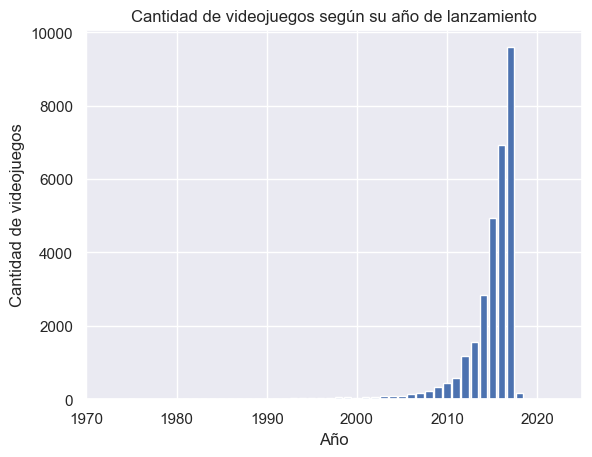

In [38]:
# Crear una serie con la cantidad de videojuegos según su año de lanzamiento.
games_by_year = (games_df.groupby("year").id.count())

# Hacer un gráfico de barras de games_by_year.
plt.bar(games_by_year.index, games_by_year.values)

# Ajustar opciones del gráfico.
plt.xlabel("Año")
plt.ylabel("Cantidad de videojuegos")
plt.title("Cantidad de videojuegos según su año de lanzamiento")
plt.xlim(1970, 2025);

Se observa un aumento exponencial del número de videojuegos lanzados al mercado desde 1970 hasta 2017. Luego cae sustancialmente hasta el 2021, pero esto es mas probable que se deba a como se recolectó la información que a un cambio en la tendencia.

### genres

La columna __genres__ está formada por un conjunto de géneros. Veremos cuáles son las combinaciones más habituales.

In [39]:
# Crear la columna genres_temp con las combinaciones de géneros.
games_df['genres_temp'] = games_df['genres'].dropna().apply(tuple)

# Mostrar las 10 combinaciones más frecuentes.
games_df['genres_temp'].value_counts()[:10]

genres_temp
(Action,)                     1879
(Action, Indie)               1650
(Simulation,)                 1396
(Casual, Simulation)          1359
(Action, Adventure, Indie)    1082
(Strategy,)                   1056
(Adventure, Indie)            1007
(Indie, RPG, Strategy)         945
(Casual, Indie)                899
(Action, Adventure)            761
Name: count, dtype: int64

Entre las combinaciones más habituales, se repiten algunos generos como  "Action", "Indie", "Simulation", "Casual" y "Strategy".

In [40]:
# Eliminar la columna genres_temp.
games_df.drop(columns=["genres_temp"], inplace=True)

Las columnas __genres__, __tags__ y __specs__ están formadas por varias etiquetas por lo que haremos una función para separarlas en columnas individuales aplicando one-hot encoding.

Es de hacer notar que los valores nulos se reemplazarán por un string vacío, para no generar nuevas columnas, lo que debe ser tenido en cuenta a la hora de hacer el sistema de recomendación.

In [41]:
def separar_columna_multilabel(df, columna):
    """
    Realizar la separación y codificación de una columna MultiLabel en un DataFrame.

    Esta función toma un DataFrame y una columna de tipo MultiLabel, realiza
    la separación y codificación de los valores contenidos en la columna usando
    one-hot encoding y devuelve un nuevo DataFrame con las columnas codificadas.
    Los valores nulos en la columna se reemplazan por un string vacío antes de
    la codificación.

    Parameters
    ----------
    df : pandas.DataFrame
        El DataFrame que contiene la columna a ser separada y codificada.
    columna : str
        El nombre de la columna que contiene los datos MultiLabel.

    Returns
    -------
    pandas.DataFrame
        Un nuevo DataFrame con las columnas codificadas utilizando one-hot encoding.

    Example
    -------
    >>> df = pd.DataFrame({'Columna_Multilabel': [['A', 'B'], ['B', 'C'], ['A']]}
    >>> resultado = separar_columna_multilabel(df, 'Columna_Multilabel')
    >>> print(resultado)

       Columna_Multilabel_A  Columna_Multilabel_B  Columna_Multilabel_C
    0                     1                     1                     0
    1                     0                     1                     1
    2                     1                     0                     0
    """
    # Reemplazar los valores nulos con un string vacío.
    df[columna].fillna(value="", inplace=True)

    # Crear una instancia de MultiLabelBinarizer.
    mlb = MultiLabelBinarizer()

    # Aplicar one-hot encoding a la columna y agregar un prefijo personalizado.
    encoded_columns = pd.DataFrame(mlb.fit_transform(df[columna]),
                                   columns=mlb.classes_)
    
    encoded_columns.columns = [f'{columna}_{col}' for col in encoded_columns.columns]
    
    # Imprimir los nombres de las columnas generadas.
    print(encoded_columns.columns)

    # Retornar el DataFrame con las columnas codificadas.
    return encoded_columns

In [42]:
# Llamar a la función y asignar el resultado a encoded_genres.
encoded_genres = separar_columna_multilabel(games_df, 'genres')

# Combinar el DataFrame original con el DataFrame codificado.
games_df = pd.concat([games_df, encoded_genres], axis=1)
games_df.head(3)

Index(['genres_Accounting', 'genres_Action', 'genres_Adventure',
       'genres_Animation &amp; Modeling', 'genres_Audio Production',
       'genres_Casual', 'genres_Design &amp; Illustration',
       'genres_Early Access', 'genres_Education', 'genres_Free to Play',
       'genres_Indie', 'genres_Massively Multiplayer', 'genres_Photo Editing',
       'genres_RPG', 'genres_Racing', 'genres_Simulation',
       'genres_Software Training', 'genres_Sports', 'genres_Strategy',
       'genres_Utilities', 'genres_Video Production', 'genres_Web Publishing'],
      dtype='object')


,id,app_name,url,release_date,genres,tags,specs,year,genres_Accounting,genres_Action,...,genres_Photo Editing,genres_RPG,genres_Racing,genres_Simulation,genres_Software Training,genres_Sports,genres_Strategy,genres_Utilities,genres_Video Production,genres_Web Publishing
0,761140,Lost Summoner Kitty,http://store.steampowered.com/app/761140/Lost_...,2018-01-04,"[Action, Casual, Indie, Simulation, Strategy]","[Strategy, Action, Indie, Casual, Simulation]",[Single-player],2018.0,0,1,...,0,0,0,1,0,0,1,0,0,0
1,643980,Ironbound,http://store.steampowered.com/app/643980/Ironb...,2018-01-04,"[Free to Play, Indie, RPG, Strategy]","[Free to Play, Strategy, Indie, RPG, Card Game...","[Single-player, Multi-player, Online Multi-Pla...",2018.0,0,0,...,0,1,0,0,0,0,1,0,0,0
2,670290,Real Pool 3D - Poolians,http://store.steampowered.com/app/670290/Real_...,2017-07-24,"[Casual, Free to Play, Indie, Simulation, Sports]","[Free to Play, Simulation, Sports, Casual, Ind...","[Single-player, Multi-player, Online Multi-Pla...",2017.0,0,0,...,0,0,0,1,0,1,0,0,0,0


In [43]:
# Renombrar algunas columnas para mejorar la legibilidad.
games_df.rename(
    columns={'genres_Animation &amp; Modeling': 'genres_Animation & Modeling',
             'genres_Design &amp; Illustration': 'genres_Design & Illustration'},
             inplace=True)

Analizaremos ahora la distribución de videojuegos según genero.

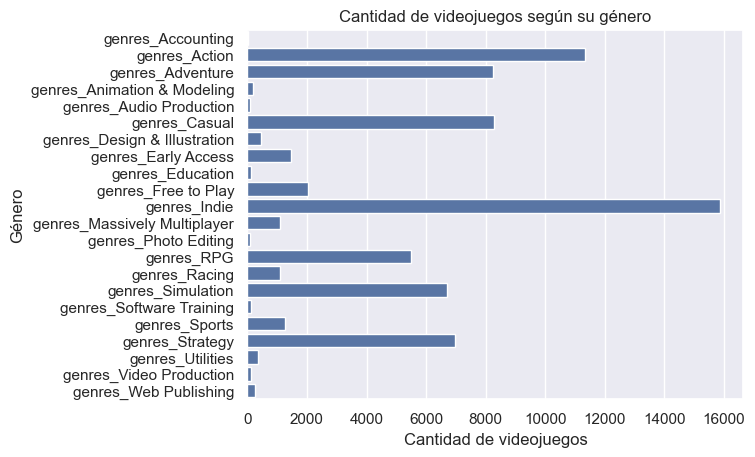

In [44]:
# Crear una serie con el número de videojuegos por género.
games_by_genre = games_df.loc[:, "genres_Accounting":"genres_Web Publishing"].sum()

# Utilizar games_by_genre para crear un gráfico de barras.
sns.barplot(x=games_by_genre.values, y=games_by_genre.index)

# Agregar etiquetas y títulos.
plt.xlabel("Cantidad de videojuegos")
plt.ylabel("Género")
plt.title("Cantidad de videojuegos según su género");

Si bien "Action" en el primer lugar entre los juegos que contenían solo esa etiqueta, "Indie" es el genero que mas aparece, considerando todas sus combinaciones. Los siguen en cercanos tercer y cuarto lugar "Casual" y "Adventure".

### tags

Esta columna hace referencia a etiquetas del juego. Vemos las combinaciones más habituales de tags.

In [45]:
# Crear la columna tags_temp con las combinaciones de tags.
games_df['tags_temp'] = games_df['tags'].dropna().apply(tuple)

# Mostrar las 10 combinaciones más frecuentes.
games_df['tags_temp'].value_counts()[:10]

tags_temp
(Casual, Simulation)          1292
(Action,)                     1105
(Simulation,)                 1085
(Strategy, RPG, Indie)         632
(Strategy,)                    625
(Action, Indie)                508
(Action, Adventure)            364
(Indie, Casual)                339
(Action, Adventure, Indie)     338
(Adventure, Indie)             288
Name: count, dtype: int64

Entre las combinaciones más habituales, se repiten algunos tags similares a los de la columna genres.

In [46]:
# Eliminar la columna tags_temp.
games_df.drop(columns=["tags_temp"], inplace=True)

In [47]:
# Llamar a la función y asignar el resultado a encoded_tags.
encoded_tags = separar_columna_multilabel(games_df, 'tags')

# Combinar el DataFrame original con el DataFrame codificado.
games_df = pd.concat([games_df, encoded_tags], axis=1)
games_df.head(3)

Index(['tags_1980s', 'tags_1990's', 'tags_2.5D', 'tags_2D', 'tags_2D Fighter',
       'tags_360 Video', 'tags_3D Platformer', 'tags_3D Vision',
       'tags_4 Player Local', 'tags_4X',
       ...
       'tags_Warhammer 40K', 'tags_Web Publishing', 'tags_Werewolves',
       'tags_Western', 'tags_Word Game', 'tags_World War I',
       'tags_World War II', 'tags_Wrestling', 'tags_Zombies', 'tags_e-sports'],
      dtype='object', length=339)


,id,app_name,url,release_date,genres,tags,specs,year,genres_Accounting,genres_Action,...,tags_Warhammer 40K,tags_Web Publishing,tags_Werewolves,tags_Western,tags_Word Game,tags_World War I,tags_World War II,tags_Wrestling,tags_Zombies,tags_e-sports
0,761140,Lost Summoner Kitty,http://store.steampowered.com/app/761140/Lost_...,2018-01-04,"[Action, Casual, Indie, Simulation, Strategy]","[Strategy, Action, Indie, Casual, Simulation]",[Single-player],2018.0,0,1,...,0,0,0,0,0,0,0,0,0,0
1,643980,Ironbound,http://store.steampowered.com/app/643980/Ironb...,2018-01-04,"[Free to Play, Indie, RPG, Strategy]","[Free to Play, Strategy, Indie, RPG, Card Game...","[Single-player, Multi-player, Online Multi-Pla...",2018.0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,670290,Real Pool 3D - Poolians,http://store.steampowered.com/app/670290/Real_...,2017-07-24,"[Casual, Free to Play, Indie, Simulation, Sports]","[Free to Play, Simulation, Sports, Casual, Ind...","[Single-player, Multi-player, Online Multi-Pla...",2017.0,0,0,...,0,0,0,0,0,0,0,0,0,0


Analizaremos ahora la distribución de videojuegos según tag. Al haber 339 tags, solo graficaremos las 20 mas frecuentes para tener menjor idea..

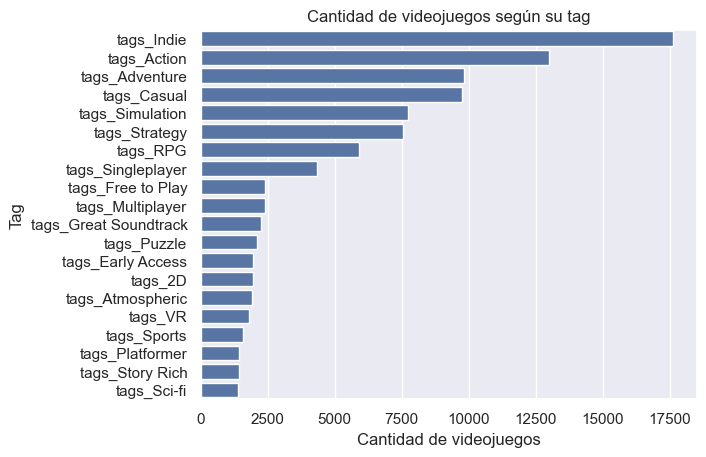

In [48]:
# Crear una serie con el número de juegos según tag, para las 20 tags 
# con mas juegos.
games_by_tag = games_df.loc[:, "tags_1980s":"tags_e-sports"].sum()
games_by_tag = games_by_tag.sort_values(ascending=False)[:20]

# Utilizar games_by_tag para crear un gráfico de barras.
sns.barplot(x=games_by_tag.values, y=games_by_tag.index)

# Agregar etiquetas y título al gráfico.
plt.xlabel("Cantidad de videojuegos")
plt.ylabel("Tag")
plt.title("Cantidad de videojuegos según su tag");

La tendencia es similar a la columna genres. "Indie" en primer lugar, "Action" segunda y "Adventure" y "Casual" cercanas en el tercer y cuarto lugar. Esto podría indicar una fuerte asociación entre las columnas genres y tags, aunque es de hacer notar que hay 22 géneros y 339 tags, por lo que vale la pena conservar ambos atributos, a pesar de cierta redundancia.

### specs

Esta columna hace referencia a especificaciones del juego. Vemos las combinaciones más habituales.

In [49]:
# Crear la columna specs_temp con las combinaciones de specs.
games_df['specs_temp'] = games_df['specs'].dropna().apply(tuple)

# Mostrar las 10 combinaciones más frecuentes.
games_df['specs_temp'].value_counts()[:10]

specs_temp
(Single-player,)                                                                                                                                                    2794
(Single-player, Downloadable Content)                                                                                                                               1204
(Single-player, Shared/Split Screen, Downloadable Content, Steam Achievements, Steam Trading Cards, Partial Controller Support, Steam Cloud, Steam Leaderboards)    1015
(Single-player, Steam Achievements)                                                                                                                                  824
(Multi-player, Co-op, Cross-Platform Multiplayer, Downloadable Content)                                                                                              756
(Single-player, Steam Achievements, Steam Trading Cards)                                                                                        

Entre las combinaciones mas habituales están "Single-Player", "Downloadable Content" y otras referidas a la plataforma Steam ("Steam Achievements", "Steam Trading Cards", etc.).

In [50]:
# Eliminar la columna specs_temp.
games_df.drop(columns=["specs_temp"], inplace=True)

In [51]:
# Llamar a la función y asignar el resultado a encoded_specs.
encoded_specs = separar_columna_multilabel(games_df, 'specs')

# Combinar el DataFrame original con el DataFrame codificado.
games_df = pd.concat([games_df, encoded_specs], axis=1)
games_df.head(3)

Index(['specs_Captions available', 'specs_Co-op', 'specs_Commentary available',
       'specs_Cross-Platform Multiplayer', 'specs_Downloadable Content',
       'specs_Full controller support', 'specs_Game demo', 'specs_Gamepad',
       'specs_HTC Vive', 'specs_In-App Purchases', 'specs_Includes Source SDK',
       'specs_Includes level editor', 'specs_Keyboard / Mouse',
       'specs_Local Co-op', 'specs_Local Multi-Player', 'specs_MMO',
       'specs_Mods', 'specs_Mods (require HL1)', 'specs_Mods (require HL2)',
       'specs_Multi-player', 'specs_Oculus Rift', 'specs_Online Co-op',
       'specs_Online Multi-Player', 'specs_Partial Controller Support',
       'specs_Room-Scale', 'specs_Seated', 'specs_Shared/Split Screen',
       'specs_Single-player', 'specs_Standing', 'specs_Stats',
       'specs_Steam Achievements', 'specs_Steam Cloud',
       'specs_Steam Leaderboards', 'specs_Steam Trading Cards',
       'specs_Steam Turn Notifications', 'specs_Steam Workshop',
       'specs_Ste

,id,app_name,url,release_date,genres,tags,specs,year,genres_Accounting,genres_Action,...,specs_Steam Achievements,specs_Steam Cloud,specs_Steam Leaderboards,specs_Steam Trading Cards,specs_Steam Turn Notifications,specs_Steam Workshop,specs_SteamVR Collectibles,specs_Tracked Motion Controllers,specs_Valve Anti-Cheat enabled,specs_Windows Mixed Reality
0,761140,Lost Summoner Kitty,http://store.steampowered.com/app/761140/Lost_...,2018-01-04,"[Action, Casual, Indie, Simulation, Strategy]","[Strategy, Action, Indie, Casual, Simulation]",[Single-player],2018.0,0,1,...,0,0,0,0,0,0,0,0,0,0
1,643980,Ironbound,http://store.steampowered.com/app/643980/Ironb...,2018-01-04,"[Free to Play, Indie, RPG, Strategy]","[Free to Play, Strategy, Indie, RPG, Card Game...","[Single-player, Multi-player, Online Multi-Pla...",2018.0,0,0,...,1,0,0,1,0,0,0,0,0,0
2,670290,Real Pool 3D - Poolians,http://store.steampowered.com/app/670290/Real_...,2017-07-24,"[Casual, Free to Play, Indie, Simulation, Sports]","[Free to Play, Simulation, Sports, Casual, Ind...","[Single-player, Multi-player, Online Multi-Pla...",2017.0,0,0,...,0,0,0,0,0,0,0,0,0,0


Analizaremos ahora la distribución de videojuegos según spec. Al haber 40 specs, solo graficaremos las 20 mas frecuentes para tener una mejor idea.

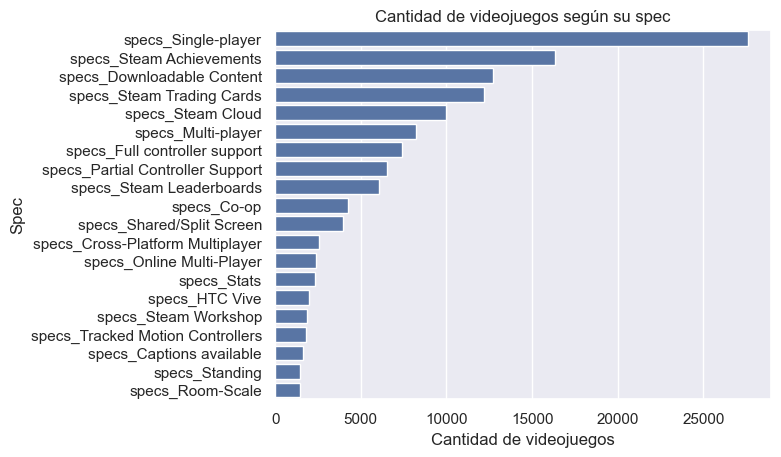

In [52]:
# Crear una serie con el número de juegos según spec, para las 20 specs 
# con mas juegos.
games_by_spec = games_df.loc[:, "specs_Captions available":"specs_Windows Mixed Reality"].sum()
games_by_spec = games_by_spec.sort_values(ascending=False)[:20]


# Utilizar games_by_spec para crear un gráfico de barras.
sns.barplot(x=games_by_spec.values, y=games_by_spec.index)

# Agregar etiquetas y título al gráfico.
plt.xlabel("Cantidad de videojuegos")
plt.ylabel("Spec")
plt.title("Cantidad de videojuegos según su spec");

El spec más repetido es "Single-Player", seguido de "Steam Achievements" y "Downloadable content".

### Carga del DataFrame procesado

Habiendo finalizado esta etapa del EDA, se seleccionarán aquellas columnas relevantes para la API y los modelos de machine learning y se guardará en un archivo .csv

Usaremos las columnas "genres", "tags" y "specs" para el sistema de recomendación, por lo que aquellos registros que no tengan información en ninguna de estas 3, no serán útiles en nuestro sistema y deben ser eliminadas.

In [53]:
# Obtener cuantos registros tienen estas 3 columnas vacias (string "").
((games_df.genres == "") & (games_df.tags == "") & (games_df.specs == "")).sum()

7

Solo 7 registros no tienen datos en ninguna de estas 3 columnas por lo que procedemos a eliminarlas.

In [54]:
# Crear mascara cuando genres, tags y specs contengan strings vacios.
vacios = ((games_df.genres == "") & (games_df.tags == "") & (games_df.specs == ""))

# Obtener los indices True de vacios.
indices_true = vacios.index[vacios]

# Visualizar indices_true.
indices_true

Index([5372, 9559, 21333, 21334, 21335, 23324, 27736], dtype='int64')

In [55]:
# Eliminar registros nulos en genres, tags y specs.
games_df.drop(indices_true, inplace=True)

# Resetear el índice.
games_df.reset_index(drop=True, inplace=True)

Eliminaremos las columnas que no sean necesarias.

In [56]:
games_df.drop(["url", "release_date"], axis=1,
              inplace=True)

In [57]:
# Analizar nulos.
games_df.iloc[:, :10].isna().sum() 

# La única columna que queda con valores nulos es year, con 2170 nulos.
# genres, tags y specs tienen registros con strings vacios.

id                                0
app_name                          0
genres                            0
tags                              0
specs                             0
year                           2170
genres_Accounting                 0
genres_Action                     0
genres_Adventure                  0
genres_Animation & Modeling       0
dtype: int64

In [58]:
# Crear un DataFrame temporal para poder evaluar duplicados.
games_df_temp = games_df.drop(columns=["genres", "tags", "specs"], axis=1)

# No hay duplicados.
print(f"Número de duplicados: {games_df_temp.duplicated().sum()}.")

# Borrar el DataFrame temporal para ahorrar memoria.
del games_df_temp

Número de duplicados: 0.


In [59]:
print(f"El df tiene {games_df.shape[0]} filas y {games_df.shape[1]} columnas.")

El df tiene 32125 filas y 407 columnas.


In [60]:
# Visualizar el DataFrame antes de guardarlo.
games_df.head()

,id,app_name,genres,tags,specs,year,genres_Accounting,genres_Action,genres_Adventure,genres_Animation & Modeling,...,specs_Steam Achievements,specs_Steam Cloud,specs_Steam Leaderboards,specs_Steam Trading Cards,specs_Steam Turn Notifications,specs_Steam Workshop,specs_SteamVR Collectibles,specs_Tracked Motion Controllers,specs_Valve Anti-Cheat enabled,specs_Windows Mixed Reality
0,761140,Lost Summoner Kitty,"[Action, Casual, Indie, Simulation, Strategy]","[Strategy, Action, Indie, Casual, Simulation]",[Single-player],2018.0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,643980,Ironbound,"[Free to Play, Indie, RPG, Strategy]","[Free to Play, Strategy, Indie, RPG, Card Game...","[Single-player, Multi-player, Online Multi-Pla...",2018.0,0,0,0,0,...,1,0,0,1,0,0,0,0,0,0
2,670290,Real Pool 3D - Poolians,"[Casual, Free to Play, Indie, Simulation, Sports]","[Free to Play, Simulation, Sports, Casual, Ind...","[Single-player, Multi-player, Online Multi-Pla...",2017.0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,767400,弹炸人2222,"[Action, Adventure, Casual]","[Action, Adventure, Casual]",[Single-player],2017.0,0,1,1,0,...,0,0,0,0,0,0,0,0,0,0
4,773570,Log Challenge,,"[Action, Indie, Casual, Sports]","[Single-player, Full controller support, HTC V...",NaN,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [61]:
# Guardar el DataFrame como .csv.
games_df.to_csv('./Datasets/steam_games_procesado.csv', index=False)

## user_reviews

Este dataset contiene reviews de los usuarios. Por la forma en la que están anidados los datos, y los errores obtenidos al tratar de cargar el archivo, es necesario definir una nueva función a continuación.

In [62]:
def leer_json_gzip(nombre_archivo):
    """
    Leer un archivo JSON comprimido con gzip y devolver una lista de diccionarios.

    Esta función toma la ruta de un archivo JSON comprimido con gzip, lo abre en
    modo de lectura y decodifica su contenido. Luego, recorre el contenido del
    archivo, evaluando cada línea como una expresión Python, y el resultado de
    la evaluación se almacena como un diccionario Python. Los diccionarios se
    almacenan en una lista que se devuelve como resultado.

    Parameters
    ----------
    nombre_archivo : str
        La ruta al archivo JSON comprimido con gzip que se va a leer.

    Returns
    -------
    list of dict
        Una lista de diccionarios que representan los datos del archivo JSON.

    Examples
    --------
    >>> datos = leer_json_gzip('mi_archivo.json.gz')
    >>> print(datos)
    [{'clave1': 'valor1', 'clave2': 'valor2'}, {'clave1': 'valor3', 'clave2': 'valor4'}]
    """
    with gzip.open(nombre_archivo, 'rt', encoding='utf-8') as archivo:
        return [ast.literal_eval(line.strip()) for line in archivo]

In [63]:
# Leer el archivo user_reviews.json.gz
reviews_data = leer_json_gzip('./Datasets/user_reviews.json.gz')

# Convertir la lista de diccionarios en un DataFrame.
reviews_df = pd.DataFrame(reviews_data)

# Visualizar los primeros resultados.
reviews_df.head(5)

,user_id,user_url,reviews
0,76561197970982479,http://steamcommunity.com/profiles/76561197970...,"[{'funny': '', 'posted': 'Posted November 5, 2..."
1,js41637,http://steamcommunity.com/id/js41637,"[{'funny': '', 'posted': 'Posted June 24, 2014..."
2,evcentric,http://steamcommunity.com/id/evcentric,"[{'funny': '', 'posted': 'Posted February 3.',..."
3,doctr,http://steamcommunity.com/id/doctr,"[{'funny': '', 'posted': 'Posted October 14, 2..."
4,maplemage,http://steamcommunity.com/id/maplemage,"[{'funny': '3 people found this review funny',..."


In [64]:
# Obtener información del DataFrame.
reviews_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25799 entries, 0 to 25798
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   user_id   25799 non-null  object
 1   user_url  25799 non-null  object
 2   reviews   25799 non-null  object
dtypes: object(3)
memory usage: 604.8+ KB


Se obtiene un DataFrame con 3 columnas y sin valores nulos.

In [65]:
print(f"user_id únicos: {reviews_df.user_id.nunique()}.")
print(f"user_url únicos: {reviews_df.user_url.nunique()}.")
print(f"total usuarios: {reviews_df.shape[0]}.")
print(f"usuarios duplicados: {reviews_df.duplicated(subset='user_id').sum()}.")

user_id únicos: 25485.
user_url únicos: 25485.
total usuarios: 25799.
usuarios duplicados: 314.


Vemos que hay 314 usuarios duplicados. Podría suceder que el usuario aparezca mas de una vez, pero los reviews correspondan a videojuegos diferentes, por lo que no correspondería eliminar estos registros. Para poder comparar las 3 filas, necesitamos desanidar las reviews de la columna __reviews__.

In [66]:
# Pasar a una fila nueva cada uno de los diccionarios anidados.
reviews = reviews_df.reviews.explode()

# Unir el resultado a "reviews_df" al aplicar "pd.Series" a cada elemento en
# "reviews" para convertir los diccionarios en columnas.
reviews_df = reviews_df.join(reviews.apply(pd.Series))

# Eliminar la columna original "reviews".
reviews_df.drop('reviews', axis=1, inplace=True)

In [67]:
# Obtener filas y columnas del DataFrame.
reviews_df.shape

(59333, 10)

In [68]:
# Visualizar los primeros resultados.
reviews_df.head(3)

,user_id,user_url,funny,posted,last_edited,item_id,helpful,recommend,review,0
0,76561197970982479,http://steamcommunity.com/profiles/76561197970...,,"Posted November 5, 2011.",,1250,No ratings yet,True,Simple yet with great replayability. In my opi...,NaN
0,76561197970982479,http://steamcommunity.com/profiles/76561197970...,,"Posted July 15, 2011.",,22200,No ratings yet,True,It's unique and worth a playthrough.,NaN
0,76561197970982479,http://steamcommunity.com/profiles/76561197970...,,"Posted April 21, 2011.",,43110,No ratings yet,True,Great atmosphere. The gunplay can be a bit chu...,NaN


In [69]:
# Evaluar los duplicados.
reviews_df.duplicated().sum()

874

Hay 874 duplicados por lo que se procede a eliminarlos.

In [70]:
reviews_df.drop_duplicates(inplace=True, ignore_index=True)

Volvemos a contar los usuarios.

In [71]:
print(f"user_id únicos: {reviews_df.user_id.nunique()}.")
print(f"user_url únicos: {reviews_df.user_url.nunique()}.")
print(f"total usuarios: {reviews_df.shape[0]}.")
print(f"usuarios duplicados: {reviews_df.duplicated(subset='user_id').sum()}.")

user_id únicos: 25485.
user_url únicos: 25485.
total usuarios: 58459.
usuarios duplicados: 32974.


El número de usuarios únicos permanece constante. Aquí "total usuarios" pasa a representar el número de registros, el cuál aumento por el uso de la función __pd.explode()__ sobre __reviews__. Aquí ya no corresponde eliminar "usuarios duplicados" porque cada usuario puede hacer reviews para mas de 1 juego.

Ahora vamos a quedarnos solo con las columnas que serán útiles para el análisis y los pasos posteriores.

In [72]:
columnas_seleccionadas = ["user_id", "posted", "item_id", "recommend", "review"]

reviews_df = reviews_df[columnas_seleccionadas]

In [73]:
# Visualizar DataFrame con columnas seleccionadas.
reviews_df.head()

,user_id,posted,item_id,recommend,review
0,76561197970982479,"Posted November 5, 2011.",1250,True,Simple yet with great replayability. In my opi...
1,76561197970982479,"Posted July 15, 2011.",22200,True,It's unique and worth a playthrough.
2,76561197970982479,"Posted April 21, 2011.",43110,True,Great atmosphere. The gunplay can be a bit chu...
3,js41637,"Posted June 24, 2014.",251610,True,I know what you think when you see this title ...
4,js41637,"Posted September 8, 2013.",227300,True,For a simple (it's actually not all that simpl...


In [74]:
print(f"El df tiene {reviews_df.shape[0]} filas y {reviews_df.shape[1]} columnas.")

El df tiene 58459 filas y 5 columnas.


Revisemos los valores nulos.

In [75]:
reviews_df.isna().sum()

user_id       0
posted       28
item_id      28
recommend    28
review       28
dtype: int64

Hay 28 valores faltantes en las 4 columnas que provienen de la columna original "reviews". Al ser tan pocos en relación al número de registros y no servir para responder a las consultas a la API, vamos a eliminarlos.

In [76]:
reviews_df.dropna(subset=["posted", "item_id", "recommend", "review"], 
                  inplace=True, ignore_index = True)

In [77]:
print(f"El df tiene {reviews_df.shape[0]} filas y {reviews_df.shape[1]} columnas.")

El df tiene 58431 filas y 5 columnas.


In [78]:
# Obtener información del DataFrame.
reviews_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58431 entries, 0 to 58430
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   user_id    58431 non-null  object
 1   posted     58431 non-null  object
 2   item_id    58431 non-null  object
 3   recommend  58431 non-null  object
 4   review     58431 non-null  object
dtypes: object(5)
memory usage: 2.2+ MB


Estamos en condiciones de empezar el análisis de las columnas.

### user_id

In [79]:
print(f"El número de usuarios únicos es {reviews_df.user_id.nunique()}.")

El número de usuarios únicos es 25458.


Podemos analizar la cantidad de reviews de cada uno, para ver la homogeneidad o heterogeneidad del grupo.

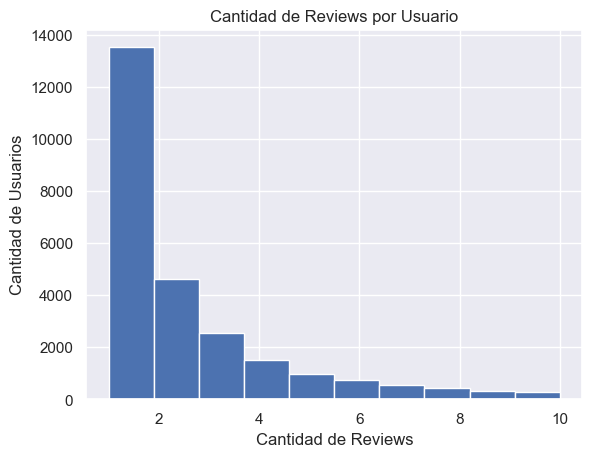

In [80]:
# Crear una serie con la cantidad de reviews por usuario.
reviews_by_user = reviews_df.user_id.value_counts()

# Graficar un histograma de reviews_by_user.
plt.hist(reviews_by_user)  

# Agregar etiquetas y título.
plt.xlabel('Cantidad de Reviews')
plt.ylabel('Cantidad de Usuarios')
plt.title('Cantidad de Reviews por Usuario');

Vemos que la gran mayoría de los usuarios ha hecho 1 sola review y que este número va disminuyendo hasta llega a 10. Este sesgo hacia la derecha es favorable en el sentido de no serán pocos usuarios quienes afecten las estadísticas por haber hecho mas reviews que los demás.

### posted

Esta es la fecha en la que fue hecha la review. De aquí solo nos interesa el año por lo que procederemos a extraerlo.

In [81]:
# Definir una expresión regular para buscar un año de cuatro dígitos
patron_anio = r'(\d{4})'

# Usa str.extract para extraer el año y crea una nueva columna 'year'
reviews_df['review_year'] = reviews_df['posted'].str.extract(patron_anio)

# Convierte la columna year en números.
reviews_df['review_year'] = pd.to_numeric(reviews_df['review_year'], 
                                          errors='coerce')

In [82]:
# Analizar nulos.
reviews_df.review_year.isna().mean()

0.16999537916516919

Hay casi un 17% de fechas para los cuales no se pudo extraer el año por no estar presente. Por ahora se dejarán el el DataFrame y en el caso de necesitarlo se lidiará con ellos. Se eliminará la columna "posted" que ya no es necesaria.

In [83]:
reviews_df.drop("posted", axis=1, inplace=True)

### review_year

Sabemos que hay casi un 17% de datos faltantes respecto al año de publicación. Para los datos no nulos, analicemos el número de reviews según año de publicación.

In [84]:
# Descripción de la columna review_year.
reviews_df.review_year.describe()

count    48498.000000
mean      2014.148150
std          0.842611
min       2010.000000
25%       2014.000000
50%       2014.000000
75%       2015.000000
max       2015.000000
Name: review_year, dtype: float64

In [85]:
# Agrupar la cantidad de reviews según su año de posteo.
reviews_by_year = (reviews_df.groupby("review_year").user_id.count())

reviews_by_year

review_year
2010.0       66
2011.0      530
2012.0     1201
2013.0     6713
2014.0    21834
2015.0    18154
Name: user_id, dtype: int64

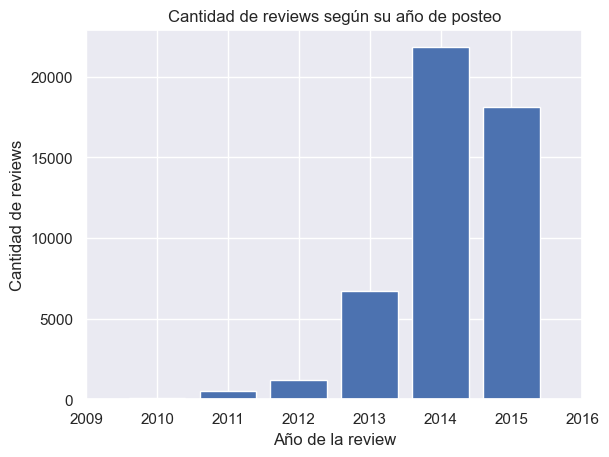

In [86]:
# Hacer un gráfico de barras de reviews_by_year
plt.bar(reviews_by_year.index, reviews_by_year.values)

# Ajustar opciones del gráfico.
plt.xlabel("Año de la review")
plt.ylabel("Cantidad de reviews")
plt.title("Cantidad de reviews según su año de posteo")
plt.xlim(2009, 2016);

Podemos ver que el número de reviews aumenta desde 2010 hasta alcanzar su máximo en 2014 y luego desciende un poco en 2015. No contamos con suficiente información para afirmar si esto representa un cambio de tendencia o es consecuencia de la recolección de datos y fecha de corte en la toma de los mismos.

### item_id

In [87]:
print(f"El número de videojuegos únicos en el dataframe es" 
      f" {reviews_df.item_id.nunique()}.")

El número de videojuegos únicos en el dataframe es 3682.


In [88]:
# Contar en cuantas reviews aparece cada juego.
reviews_df.item_id.value_counts()

item_id
730       3708
440       3694
4000      1704
570       1544
218620    1113
          ... 
33100        1
312720       1
449980       1
32770        1
431510       1
Name: count, Length: 3682, dtype: int64

Podemos ver que hay videojuegos, como el de item_id 730 con muchas reviews mientras que otros solo tienen una review.

In [89]:
# Convertir item_id al tipo entero.
reviews_df["item_id"] = reviews_df["item_id"].astype("int32")

### recommend

Esta columna indica si el usuario recomienda o no el videojuego y debe ser de tipo booleano.

In [90]:
reviews_df["recommend"] = reviews_df["recommend"].astype("bool")

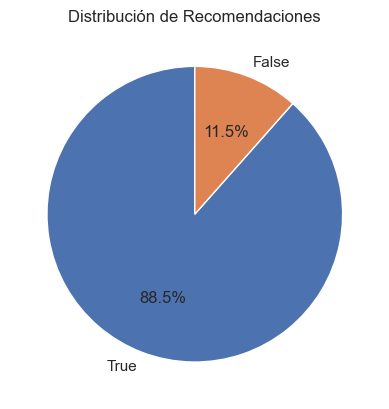

In [91]:
# Contar la cantidad de valores True y False en la columna recommend.
recommend_counts = reviews_df['recommend'].value_counts()

# Crear un pie chart. 
plt.pie(recommend_counts, labels=recommend_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Distribución de Recomendaciones');

El 88.5% de las reviews recomiendan el videojuego mientras que el 11.5% restante no lo hacen.

### review

Esta es la review en sí y sobre la misma haremos análisis de sentimiento. Primero revisemos los idiomas de las reviews.

In [92]:
# Definir una función para detectar el idioma de un texto usando la libreria langdetect.
def detect_language(text):
    try:
        return detect(text)
    # Manejo de errores en caso de que no se pueda detectar el idioma
    except:
        return None  

# Crear la columna language.    
reviews_df['language'] = reviews_df['review'].apply(detect_language)

print("Los idiomas únicos son:", reviews_df.language.unique())
print("El número de idiomas únicos es:", reviews_df.language.nunique())

Los idiomas únicos son: ['en' 'ca' 'de' 'sl' 'da' 'pt' 'so' 'tl' 'es' 'th' 'cy' 'pl' 'sw' 'ru'
 'id' 'vi' 'lt' 'hr' 'af' 'it' 'no' 'zh-cn' 'ko' 'ro' 'nl' 'tr' None 'fr'
 'cs' 'fi' 'hu' 'sv' 'et' 'lv' 'sk' 'bg' 'sq' 'ja' 'uk' 'zh-tw' 'ta' 'mk'
 'ar']
El número de idiomas únicos es: 42


In [93]:
# Visualizar los primeros resultados del DataFrame con la nueva columna.
reviews_df.head(3)

,user_id,item_id,recommend,review,review_year,language
0,76561197970982479,1250,True,Simple yet with great replayability. In my opi...,2011.0,en
1,76561197970982479,22200,True,It's unique and worth a playthrough.,2011.0,en
2,76561197970982479,43110,True,Great atmosphere. The gunplay can be a bit chu...,2011.0,en


Analicemos la proporción de reviews según el idioma predicho, ya que para la mayoría de las librerias, el análisis de sentimientos depende del idioma.

In [94]:
reviews_df.language.value_counts(normalize=True).head()

language
en    0.778388
pt    0.037195
es    0.021847
de    0.019582
so    0.017405
Name: proportion, dtype: float64

Vemos que para casi el 78% de las reviews se detecta Inglés como su idioma. Esto es favorable, ya que la mayoría de los modelos de análisis de sentimientos están entrenados primariamente para este idioma. 

Haremos análisis de sentimiento con NLP para crear la columna __sentiment_analysis__, que tomará los valores:
* __0__ si es malo.
* __1__ si es neutral.
* __2__ si es positivo.

También debería tomar el valor __1__ en caso de la columna __review__ tuviera un valor nulo. Previamente se eliminaron los 28 datos nulos, porque además de ser pocos, iban acompañados de nulos en las otras columnas derivadas de __reviews__ (posted, item_id y recommend) y su presencia no modifica las consultas a la API.

Para realizar el análisis de sentimiento se utilizará TextBlob. TextBlob es una biblioteca de NLP que simplifica tareas de procesamiento de texto como análisis de sentimientos, traducción, etiquetado de partes del discurso y extracción de frases clave. En el análisis de sentimientos, la "polaridad" es una medida que evalúa si un texto es positivo, negativo o neutral en una escala de -1 (negativo) a 1 (positivo), con 0 como neutral. Además, puede manejar varios idiomas, que es algo que hemos observado en las muestras de los títulos y profundizaremos en el EDA cuando hagamos el sistema de recomendación.

In [95]:
# Función para realizar análisis de sentimientos.
def analizar_sentimiento(review):
    """
    Analizar el sentimiento de una revisión de texto utilizando TextBlob.

    Esta función toma una revisión de texto como entrada y utiliza TextBlob para
    realizar un análisis de sentimiento.
    La polaridad del sentimiento se clasifica en tres categorías:
    - Positivo (2) si la polaridad es mayor que 0.
    - Neutral (1) si la polaridad es igual a 0.
    - Negativo (0) si la polaridad es menor que 0.

    Parameters
    ----------
    review : str
        El texto de la revisión que se va a analizar.

    Returns
    -------
    int
        El valor numérico que representa la clasificación del sentimiento.

    Examples
    --------
    >>> resultado = analizar_sentimiento("Me encantó esta película. Muy emocionante.")
    >>> print(resultado)
    2

    >>> resultado = analizar_sentimiento("Fue una experiencia promedio.")
    >>> print(resultado)
    1

    >>> resultado = analizar_sentimiento("No me gustó para nada. Terrible.")
    >>> print(resultado)
    0
    """
    analysis = TextBlob(review)
    if analysis.sentiment.polarity > 0:
        return 2
    elif analysis.sentiment.polarity < 0:
        return 0
    else:
        return 1

# Lista de idiomas admitidos por textblob.
idiomas_textblob = ['ar', 'cs', 'da', 'de', 'el','en','es', 'fi','fr','he',
                    'hu', 'it', 'ja', 'ko', 'nl', 'no', 'pl', 'pt', 'ro', 'ru',
                    'sv', 'th', 'tr', 'zh']

# Máscara de las reviews en los idiomas admitidos por textblob.
mask = reviews_df["language"].isin(idiomas_textblob)

# Aplicar la función "analizar_sentimiento" a los elementos con la máscara.
reviews_df["sentiment_analysis"] = reviews_df[mask]["review"].apply(analizar_sentimiento)

# Asignar 1 a las reseñas en idiomas no permitidos.
reviews_df.loc[~mask, "sentiment_analysis"] = 1

In [96]:
# Visualizar los primeros resultados con la columna sentiment_analysis.
reviews_df.head(3)

,user_id,item_id,recommend,review,review_year,language,sentiment_analysis
0,76561197970982479,1250,True,Simple yet with great replayability. In my opi...,2011.0,en,2.0
1,76561197970982479,22200,True,It's unique and worth a playthrough.,2011.0,en,2.0
2,76561197970982479,43110,True,Great atmosphere. The gunplay can be a bit chu...,2011.0,en,2.0


Veamos como quedó la distribución de análisis de sentimientos.

sentiment_analysis
2.0    0.530489
1.0    0.262036
0.0    0.207475
Name: proportion, dtype: float64


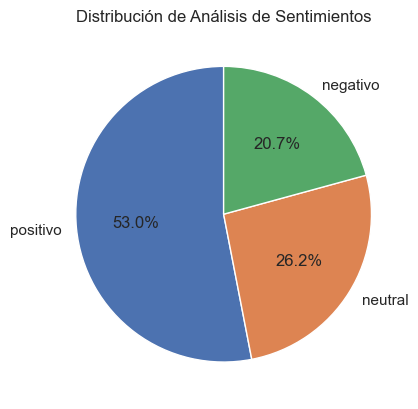

In [97]:
# Contar la cantidad de valores 0, 1 y 2 en la columna 'sentiment_analysis'
sa_counts = reviews_df.sentiment_analysis.value_counts(normalize=True)
print(sa_counts)

# Definir las etiquetas personalizadas.
custom_labels = ["positivo", "neutral", "negativo"]

# Crear un pie chart.
plt.pie(sa_counts, labels=custom_labels, autopct='%1.1f%%', startangle=90)
plt.title('Distribución de Análisis de Sentimientos');

Vemos que mas de la mitad de las reviews son positivas y el resto se dividen de manera aproximadamente igual entre neutrales o negativas. La suma de positivos y neutrales son similares al número de recomendaciónes positivas en la columna __recommend__. Es importante notar que Textblob es una libreria pre-entrenada por lo que los números exactos pueden varias un poco.

Ahora podemos eliminar las columnas __language__ y __review__.

In [98]:
reviews_df.drop(["language" , "review"], axis=1, inplace=True)

### Carga del DataFrame procesado

Habiendo finalizado esta etapa del EDA, se seleccionarán aquellas columnas relevantes para la API y los modelos de machine learning y se guardará en un archivo .csv

In [99]:
# Información del DataFrame que se guardará.
reviews_df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58431 entries, 0 to 58430
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   user_id             58431 non-null  object 
 1   item_id             58431 non-null  int32  
 2   recommend           58431 non-null  bool   
 3   review_year         48498 non-null  float64
 4   sentiment_analysis  58431 non-null  float64
dtypes: bool(1), float64(2), int32(1), object(1)
memory usage: 1.6+ MB


In [100]:
reviews_df.duplicated().sum() # No hay duplicados

0

In [101]:
reviews_df.isna().sum() # Solo al columna "review_year" tiene 9933 datos faltantes.

user_id                  0
item_id                  0
recommend                0
review_year           9933
sentiment_analysis       0
dtype: int64

In [102]:
print(f"El df tiene {reviews_df.shape[0]} filas y {reviews_df.shape[1]} columnas.")

El df tiene 58431 filas y 5 columnas.


In [103]:
# Visualizar el DataFrame antes de guardarlo.
reviews_df.head()

,user_id,item_id,recommend,review_year,sentiment_analysis
0,76561197970982479,1250,True,2011.0,2.0
1,76561197970982479,22200,True,2011.0,2.0
2,76561197970982479,43110,True,2011.0,2.0
3,js41637,251610,True,2014.0,2.0
4,js41637,227300,True,2013.0,0.0


In [104]:
# Guardar el DataFrame como .csv.
reviews_df.to_csv('./Datasets/user_reviews_procesado.csv', index=False)

## users_items

Este dataset contiene información de los usuarios, junto con los juegos a los que jugaron (cúales y cuántos), la cantidad de horas que jugaron en total y en las últimas 2 semanas a fecha de generación del dataset. Haremos un ETL junto con una exploración.

In [105]:
# Leer el archivo user_items.json.gz
items_data = leer_json_gzip('./Datasets/users_items.json.gz')

# Convertir la lista de diccionarios en DataFrame y visualizarlo.
items_df = pd.DataFrame(items_data)
items_df.head(3)

,user_id,items_count,steam_id,user_url,items
0,76561197970982479,277,76561197970982479,http://steamcommunity.com/profiles/76561197970...,"[{'item_id': '10', 'item_name': 'Counter-Strik..."
1,js41637,888,76561198035864385,http://steamcommunity.com/id/js41637,"[{'item_id': '10', 'item_name': 'Counter-Strik..."
2,evcentric,137,76561198007712555,http://steamcommunity.com/id/evcentric,"[{'item_id': '1200', 'item_name': 'Red Orchest..."


__items_count__ es una columna que no necesitaremos para responder las consultas de la API, pero antes de eliminarla la analizaremos en busca de outliers.

In [106]:
# Describir la columna items_count.
items_df.items_count.describe()

count    88310.000000
mean        58.353629
std        122.312095
min          0.000000
25%          3.000000
50%         26.000000
75%         73.000000
max       7762.000000
Name: items_count, dtype: float64

Hay mucha diferencia entre los primeros 3 cuartilos y el máximo. Analicemos outliers usando el método del rango interquartilo.

In [107]:
Q1 = items_df.items_count.quantile(0.25)
Q3 = items_df.items_count.quantile(0.75)
IQR = Q3 - Q1
limite_inferior = Q1 - 1.5 * IQR
limite_superior = Q3 + 1.5 * IQR

print("Limite inferior", limite_inferior)
print("Limite superior", limite_superior)

Limite inferior -102.0
Limite superior 178.0


Según el método __describe()__, no hay usuarios cuyo número de juegos sea inferior a 0, lo cuál tiene sentido. Respecto al límite superior de 178 obtenido por esta técnica, parece un poco conservador. Analicemos los usuarios con mayor cantidad de items.

In [108]:
items_df.sort_values("items_count", ascending=False).head(3)

,user_id,items_count,steam_id,user_url,items
3708,phrostb,7762,76561198102767019,http://steamcommunity.com/id/phrostb,"[{'item_id': '300', 'item_name': 'Day of Defea..."
19055,thugnificent,6700,76561198000537256,http://steamcommunity.com/id/thugnificent,"[{'item_id': '10', 'item_name': 'Counter-Strik..."
1104,chidvd,6410,76561198001518866,http://steamcommunity.com/id/chidvd,"[{'item_id': '10', 'item_name': 'Counter-Strik..."


A la fecha de este análisis (2023-10-04), y guiandome por los user_url, el número de juegos de los 3 usuarios con mas juegos es 17534, 11272 y 11860 respectivamente. Es decir, son incluso mayores que el máximo en esta base de datos que es 7762. Por lo tanto el dato, a pesar de ser atípico, guarda verosimilitud, y no serán eliminados dichos registros.

Seleccionaremos solo las columnas de interés para el análisis y responder las consultas a la API.

In [109]:
columnas_seleccionadas = ["user_id", "items_count", "items"]

items_df = items_df[columnas_seleccionadas]

In [110]:
# Visualizar el DataFrame con las columnas seleccionadas.
items_df.head(3)

,user_id,items_count,items
0,76561197970982479,277,"[{'item_id': '10', 'item_name': 'Counter-Strik..."
1,js41637,888,"[{'item_id': '10', 'item_name': 'Counter-Strik..."
2,evcentric,137,"[{'item_id': '1200', 'item_name': 'Red Orchest..."


La columna __items__ contiene muchos diccionarios anidados y la funcion __pd.explode()__ no sería eficiente, porque demoraría mucho tiempo, consumiría muchos recursos y nos traería información que no necesitamos. Del DataFrame actual solo nos quedaremos con __user_id__, y de __items__, con __item_id__ y __playtime_forever__.

Primero crearemos una lista donde cada __user_id__ se repita tantas veces como la cantidad de juegos que jugó. Esa información está en la columna __items_count__.

In [111]:
# Crear lista vacía para almacenar los user_id.
user_id_list = []

# Iteramos el DataFrame usando el metodo pd.iterrows().
for index, row in items_df.iterrows():
    
    user_id = row['user_id'] # Asignamos el "user_id" a la variable "user_id".
    items_count = row['items_count'] # Asignamos el "items_count" a la variable "items_count".

    # Extendemos la lista con "user_id" apareciendo "items_count" veces.
    user_id_list.extend([user_id] * items_count) 

Ahora haremos 2 listas más, conteniendo los __item_id__ y los __playtime_forever__ (tiempo de juego total).

In [112]:
# Crear listas vacías para almacenar los valores.
item_id_list = []
playtime_forever_list = []

# Iterar a través de las listas de diccionarios en la columna "items" y extraer los valores.
for item_list in items_df['items']:
    item_id_values = [item['item_id'] for item in item_list]
    playtime_forever_values = [item['playtime_forever'] for item in item_list]

    # Extender las listas con los nuevos valores.
    item_id_list.extend(item_id_values)
    playtime_forever_list.extend(playtime_forever_values)

Con estas 3 listas, reconstruiremos el dataframe items_df.

In [113]:
items_df = pd.DataFrame({'user_id': user_id_list,
                        'item_id': item_id_list,
                        'playtime_forever': playtime_forever_list})

# Visualizar los primeros resultados.
items_df.head(3)

,user_id,item_id,playtime_forever
0,76561197970982479,10,6
1,76561197970982479,20,0
2,76561197970982479,30,7


In [114]:
# Obtener información de items_df.
items_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5153209 entries, 0 to 5153208
Data columns (total 3 columns):
 #   Column            Dtype 
---  ------            ----- 
 0   user_id           object
 1   item_id           object
 2   playtime_forever  int64 
dtypes: int64(1), object(2)
memory usage: 117.9+ MB


In [115]:
# Analizar duplicados en items_df.
items_df.duplicated().sum()

59117

Hay 59117 duplicados por lo que se procede a eliminarlos.

In [116]:
items_df.drop_duplicates(inplace=True, ignore_index=True)

In [117]:
items_df.isna().mean() # No hay valores nulos.

user_id             0.0
item_id             0.0
playtime_forever    0.0
dtype: float64

In [118]:
items_df.user_id.nunique() # Hay 70912 usuarios únicos.

70912

In [119]:
items_df.item_id.nunique() # Hay 10978 juegos únicos.

10978

Según la documentación en la web de Steam, __playtime_forever__ is 'the total number of minutes played "on record", since Steam began tracking total playtime in early 2009'. Para responder a las consultas de la API necesitamos esta información en horas por lo que haremos la transformación.

In [120]:
items_df.playtime_forever = (items_df.playtime_forever / 60).round(2)

In [121]:
# Describir la columna playtime_forever.
items_df.playtime_forever.describe()

count    5.094092e+06
mean     1.650862e+01
std      9.023516e+01
min      0.000000e+00
25%      0.000000e+00
50%      5.700000e-01
75%      5.920000e+00
max      1.071288e+04
Name: playtime_forever, dtype: float64

El máximo valor dista mucho de los otros cuartilos, por lo que evaluaremos outliers siguendo el método del rango intercuartílico.

In [122]:
Q1 = items_df.playtime_forever.quantile(0.25)
Q3 = items_df.playtime_forever.quantile(0.75)
IQR = Q3 - Q1
limite_inferior = Q1 - 1.5 * IQR
limite_superior = Q3 + 1.5 * IQR

print("Limite inferior", limite_inferior)
print("Limite superior", limite_superior)

Limite inferior -8.879999999999999
Limite superior 14.799999999999999


Según __describe()__ no hay resultados menores a 0 horas jugadas, lo cuál es lógico. Analicemos aquellos valores por encima del límite superior y que corresponden a outliers según este método.

In [123]:
# Crear una máscara para los valores de playtime_forever superiores a limite_superior.
mask = items_df.playtime_forever > limite_superior

# Filtrar el DataFrame con la máscara y ordenar por playtime_forever.
items_df[mask].sort_values("playtime_forever")

,user_id,item_id,playtime_forever
4818708,76561198078552000,500,14.80
3972479,XxNinJA_SpAZxX,21100,14.80
2667997,007james_bond,32360,14.80
495226,76561198039088657,50,14.80
114970,Crazymac123,238090,14.80
...,...,...,...
1810632,tsunamitad,72200,10001.13
1475635,76561198039832932,4000,10223.52
4017482,76561198019826668,42710,10540.87
2461639,Evilutional,212200,10588.25


El primer outlier, 14.80 horas, no es un valor tan grande, y a pesar de ser un outlier según este método, no parece un error que debería ser eliminado. 

Consideremos el último dato: 10712 horas. Si consideramos que __playtime_forever__ empezó ser medido por Steam en 2009, y que user_reviews abarca 6 años [2010, 2015], esto correspondería a 1785 horas por año y 4.9 horas por dia. Si bien es posible, es improbable que una persona juegue casi 5 horas por dia, todos los dias durante 6 años. Por lo tanto es probable que este dato y otros similares sean errores que haya que eliminar.

Vamos a analizar un poco a esos usuarios.

In [124]:
# Ordenar los elementos por playtime_forever descendente.
items_df[mask].sort_values("playtime_forever", ascending=False).head()

,user_id,item_id,playtime_forever
584979,wolop,4000,10712.88
2461639,Evilutional,212200,10588.25
4017482,76561198019826668,42710,10540.87
1475635,76561198039832932,4000,10223.52
1810632,tsunamitad,72200,10001.13


Analizando en Steam al usuario con el user_id [tsunamitad](https://steamcommunity.com/id/tsunamitad) encontramos que en efecto sus horas jugadas totales son 10001.

El límite inferior de recolección de los datos sabemos que es 2009 porque es información oficial de Steam. Sin embargo, el límite superior no lo conocemos y corresponde a la fecha en el que se hizo el scrapping de los datos. Si fuera el 2023, como sugiere la consulta que se hizo al sitio de este usuario el 2023-10-25, las 10001 horas corresponderían a un periodo máximo de 15 años, es decir 666 horas por año o 1,8 horas por dia.

Mas allá de este usuario en particular, esto nos indica que valores en el orden de 10000 horas para playtime_forever, si bien atípicos, a priori no representarían errores y no será prudente descartarlos.

No obstante lo anterior, si un mismo usuario tuviera varios items con valores tan altos, la suma si quedaría ya fuera de escala. Asique analicemos el número de horas jugadas totales por usuario.

In [125]:
# Horas totales jugadas por usuario, en orden descendente.
total_playtime_per_user = items_df.groupby("user_id").sum()\
    .sort_values("playtime_forever", ascending=False)\
    ["playtime_forever"]

total_playtime_per_user.head()

user_id
REBAS_AS_F-T        77673.29
shinomegami         55058.33
Sp3ctre             47047.69
DownSyndromeKid     46506.40
Terminally-Chill    28900.07
Name: playtime_forever, dtype: float64

Que un usuario haya jugado en total 77673 horas parece improbable. No obstante, investigando un poco, encontramos al usuario [WoogieMonster](https://steamcommunity.com/id/WoogieMonster) que al 2023-10-25 acumula 53998 horas jugadas solo en su juego favorito. Este valor está cercano al segundo de la lista, por lo que es posible que valores en el orden de 77000 sean reales. Antes la ausencia de mayor información, optaremos por no descartar estos outliers.

In [126]:
print(f"El df tiene {items_df.shape[0]} filas y {items_df.shape[1]} columnas.")

El df tiene 5094092 filas y 3 columnas.


In [127]:
# Guardar el DataFrame como .csv.
items_df.to_csv('./Datasets/user_items_procesado.csv', index=False)